In [1]:
import pandas as pd

# Load the CSV file into a data frame
df = pd.read_csv('unsafe-report-functions.csv')
# df = pd.read_csv('unsafe-report-functions-subset.csv')

# Display the data frame
df

,file_path,function_name,function_id,is_unsafe,function_expression_count,unsafe_blocks_count,unsafe_block_expression_count
0,extracted-crates/vu/lk/vulkan_rs/0.3.0-downloa...,compile_sharers,0,False,104,1,8
1,extracted-crates/vu/lk/vulkan_rs/1.0.62-downlo...,compile_sharers,0,False,104,1,8
2,extracted-crates/tm/az/tmaze/1.14.2-download:1...,save_mp3,0,False,71,2,6
3,extracted-crates/tm/az/tmaze/1.14.2-download:1...,save_mp3,0,False,71,2,6
4,extracted-crates/tm/q-/tmq-zmq/0.9.0-download:...,main,0,False,21,1,8
...,...,...,...,...,...,...,...
16942717,extracted-crates/tf/mi/tfmicro/0.1.0-download:...,push,3,False,12,1,8
16942718,extracted-crates/tf/mi/tfmicro/0.1.0-download:...,to_little_endian,0,False,11,1,2
16942719,extracted-crates/tf/mi/tfmicro/0.1.0-download:...,from_little_endian,1,False,11,1,2
16942720,extracted-crates/tf/mi/tfmicro/0.1.0-download:...,push,2,False,11,1,7


In [2]:
# subset_df = df.sample(n=100000, random_state=42)
# subset_df.to_csv('unsafe-report-functions-subset.csv', index=False)

<Axes: xlabel='function_expression_count', ylabel='unsafe_block_expression_count'>

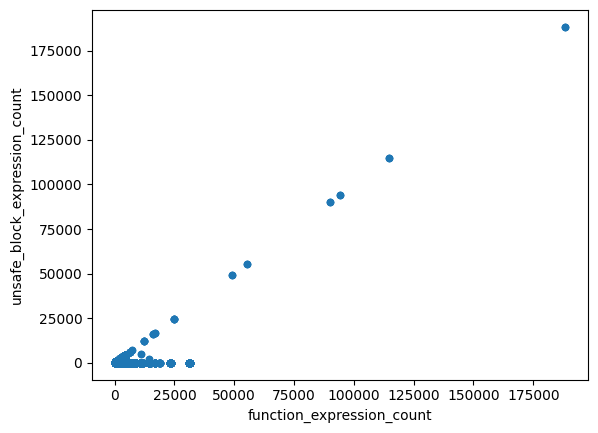

In [3]:
df.plot.scatter(x='function_expression_count', y='unsafe_block_expression_count')


In [4]:
unsafe_expression_count = df.groupby(['file_path', 'function_name', 'function_id', 'function_expression_count'])['unsafe_block_expression_count'].sum().reset_index()
unsafe_expression_count.columns = ['file_path', 'function_name', 'function_id', 'function_expression_count', 'unsafe_expression_count']
unsafe_expression_count


,file_path,function_name,function_id,function_expression_count,unsafe_expression_count
0,extracted-crates/1/m/0.1.0-download:1.0.0.crat...,atanf,0,251,26
1,extracted-crates/1/m/0.1.1-download:1.0.0.crat...,atanf,0,251,26
2,extracted-crates/1/z/0.1.0-download:1.0.0.crat...,next,3,96,60
3,extracted-crates/1/z/0.1.0-download:1.0.0.crat...,trace_event,0,18,3
4,extracted-crates/1/z/0.1.0-download:1.0.0.crat...,trace_start,1,18,3
...,...,...,...,...,...
14866665,extracted-crates/zy/re/zyre/0.2.0-download:1.0...,size,20,5,4
14866666,extracted-crates/zy/re/zyre/0.2.0-download:1.0...,start,4,16,15
14866667,extracted-crates/zy/re/zyre/0.2.0-download:1.0...,stop,5,5,4
14866668,extracted-crates/zy/re/zyre/0.2.0-download:1.0...,uuid,2,11,10


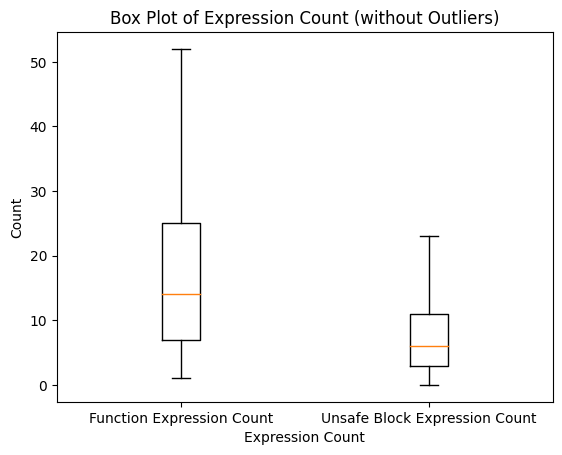

In [5]:
import matplotlib.pyplot as plt

plt.boxplot([df['function_expression_count'], df['unsafe_block_expression_count']], showfliers=False)

# Set the labels and title
plt.xlabel('Expression Count')
plt.ylabel('Count')
plt.title('Box Plot of Expression Count (without Outliers)')

# Set the x-axis tick labels
plt.xticks([1, 2], ['Function Expression Count', 'Unsafe Block Expression Count'])

# Display the box plot
plt.show()


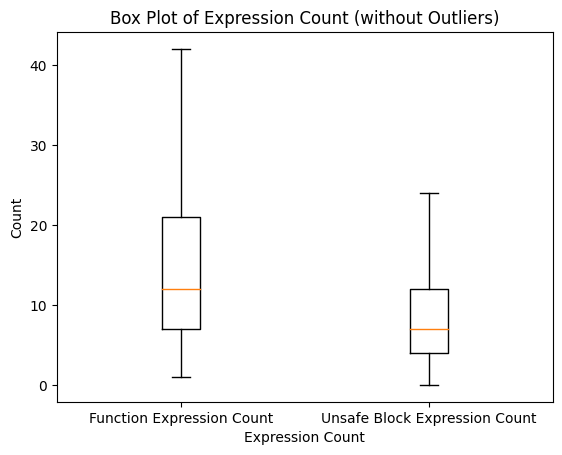

In [6]:
import matplotlib.pyplot as plt

plt.boxplot([unsafe_expression_count['function_expression_count'], unsafe_expression_count['unsafe_expression_count']], showfliers=False)

# Set the labels and title
plt.xlabel('Expression Count')
plt.ylabel('Count')
plt.title('Box Plot of Expression Count (without Outliers)')

# Set the x-axis tick labels
plt.xticks([1, 2], ['Function Expression Count', 'Unsafe Block Expression Count'])

# Display the box plot
plt.show()


In [7]:
q1 = df['function_expression_count'].quantile(0.25)
q2 = df['function_expression_count'].quantile(0.5)
q3 = df['function_expression_count'].quantile(0.75)
(q1, q2, q3)

(7.0, 14.0, 25.0)

In [8]:
unsafe_expression_count['expression_count_ratio'] = unsafe_expression_count['unsafe_expression_count'] / unsafe_expression_count['function_expression_count']

In [9]:
rows_with_ratio_more_than_1 = unsafe_expression_count[unsafe_expression_count['expression_count_ratio'] > 1]
assert rows_with_ratio_more_than_1.empty


AssertionError: 

<Axes: >

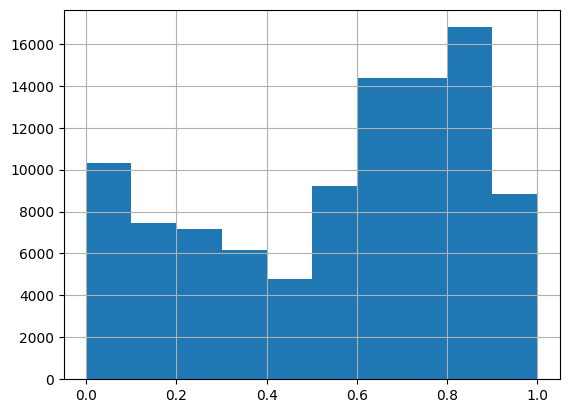

In [ ]:
unsafe_expression_count['expression_count_ratio'].hist()

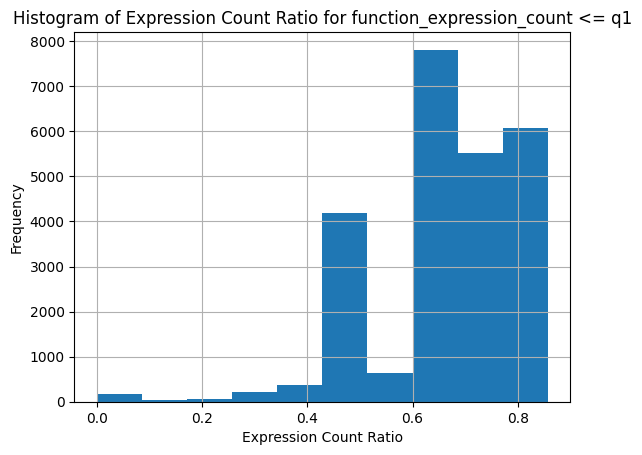

In [ ]:
unsafe_expression_count[unsafe_expression_count['function_expression_count'] <= q1]['expression_count_ratio'].hist()
plt.xlabel('Expression Count Ratio')
plt.ylabel('Frequency')
plt.title('Histogram of Expression Count Ratio for function_expression_count <= q1')
plt.show()

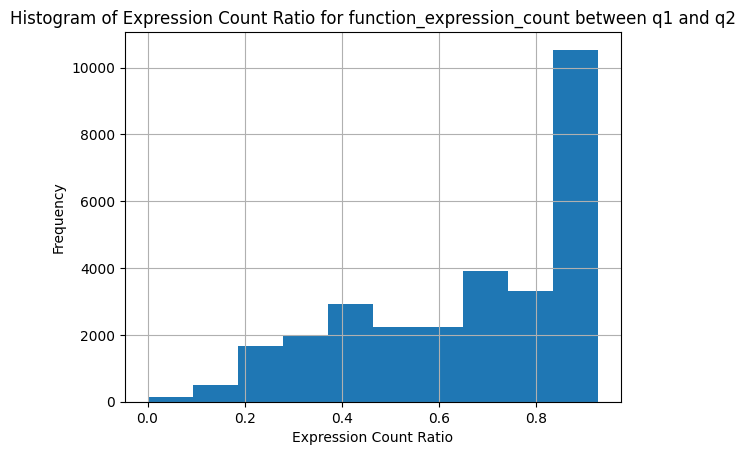

In [ ]:
unsafe_expression_count[(unsafe_expression_count['function_expression_count'] >= q1) & (unsafe_expression_count['function_expression_count'] <= q2)]['expression_count_ratio'].hist()
plt.xlabel('Expression Count Ratio')
plt.ylabel('Frequency')
plt.title('Histogram of Expression Count Ratio for function_expression_count between q1 and q2')
plt.show()

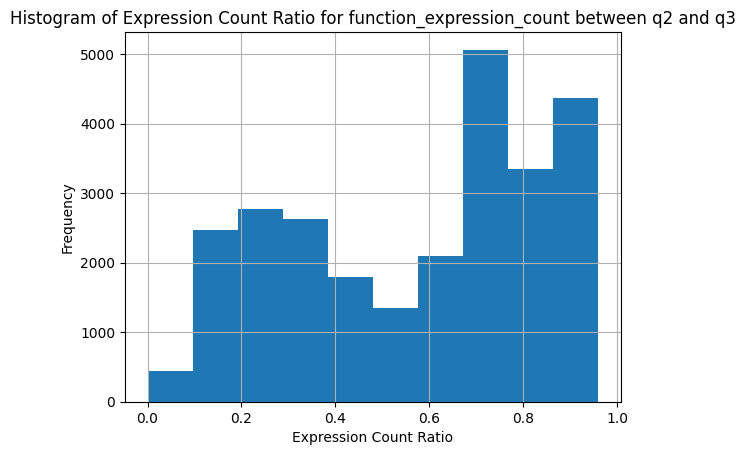

In [ ]:
unsafe_expression_count[(unsafe_expression_count['function_expression_count'] >= q2) & (unsafe_expression_count['function_expression_count'] <= q3)]['expression_count_ratio'].hist()
plt.xlabel('Expression Count Ratio')
plt.ylabel('Frequency')
plt.title('Histogram of Expression Count Ratio for function_expression_count between q2 and q3')
plt.show()

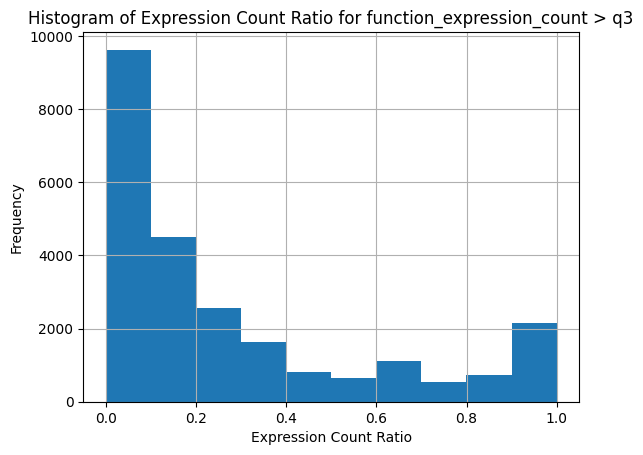

In [ ]:
unsafe_expression_count[unsafe_expression_count['function_expression_count'] > q3]['expression_count_ratio'].hist()
plt.xlabel('Expression Count Ratio')
plt.ylabel('Frequency')
plt.title('Histogram of Expression Count Ratio for function_expression_count > q3')
plt.show()

In [ ]:
# Filter the dataframe based on the expression_count_ratio <= 0.2
filtered_df = unsafe_expression_count[unsafe_expression_count['expression_count_ratio'] <= 0.2]

# Get 10 random examples from the filtered dataframe
random_examples = filtered_df.sample(n=10, random_state=42)

# Display the random examples
random_examples
# Set the display options to show full column width
pd.set_option('display.max_colwidth', None)

# Display the full file_path, function_name, and the counts
random_examples[['file_path', 'function_name', 'function_expression_count', 'unsafe_expression_count']]

,file_path,function_name,function_expression_count,unsafe_expression_count
51569,extracted-crates/ox/yg/oxygengine-user-interface/0.20.0-download:1.0.0.crate/oxygengine-user-interface-0.20.0/src/system.rs,user_interface_system,641,5
64698,extracted-crates/sa/pp/sapp-windows/0.2.0-download:1.0.0.crate/sapp-windows-0.2.0/src/sokol_app_gnu.rs,new_bitfield_1,71,3
49472,extracted-crates/op/en/opencv/0.84.4-download:1.0.0.crate/opencv-0.84.4/docs/rgbd.rs,new_1,21,3
72468,extracted-crates/tm/4c/tm4c123x-hal/0.9.1-download:1.0.0.crate/tm4c123x-hal-0.9.1/src/sysctl.rs,control_deep_sleep_power,375,7
8058,extracted-crates/bc/c-/bcc-sys/0.1.0-download:1.0.0.crate/bcc-sys-0.1.0/src/libbpf.rs,__w_coredump,30,4
48468,extracted-crates/op/en/opencv/0.80.0-download:1.0.0.crate/opencv-0.80.0/docs/core.rs,apply,21,3
16502,extracted-crates/fa/st/fast_image_resize/0.9.4-download:1.0.0.crate/fast_image_resize-0.9.4/benches/bench_resize.rs,downscale_bench,43,3
65351,extracted-crates/se/lf/selfref/0.4.2-download:1.0.0.crate/selfref-0.4.2/src/srce.rs,open_ro,58,4
65874,extracted-crates/sh/ip/shipyard/0.6.0-alpha.4-download:1.0.0.crate/shipyard-0.6.0-alpha.4/src/borrow/mod.rs,borrow,44,8
64088,extracted-crates/sa/fe/safe_app/0.3.0-download:1.0.0.crate/safe_app-0.3.0/src/ffi/nfs.rs,open_close_file,40,1
